In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r'C:\JupyterNotebook\DataSet\play_store.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


(array([  17.,   18.,   41.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

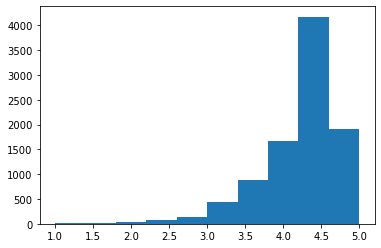

In [3]:
data=data[data['Rating']<=5]
plt.hist(data['Rating'])

In [4]:
#Sum of null values of each column
total_null = data.isnull().sum()

In [5]:
#Percentage of null values of each column
percent_null = (total_null/data.isnull().count())

In [6]:
#Concatenating total_null and percent_null values
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
App,0,0.000000
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,0,0.000000
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000


In [7]:
#Dropping the null values
data.dropna(inplace = True)

In [8]:
#Sum of null values of each column
total_null_1 = data.isnull().sum()

#Percentage of null values of each column
percent_null_1 = (total_null_1/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

missing_data_1

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


Text(0.5, 1.0, 'Rating vs Category [BoxPlot]')

<Figure size 720x720 with 0 Axes>

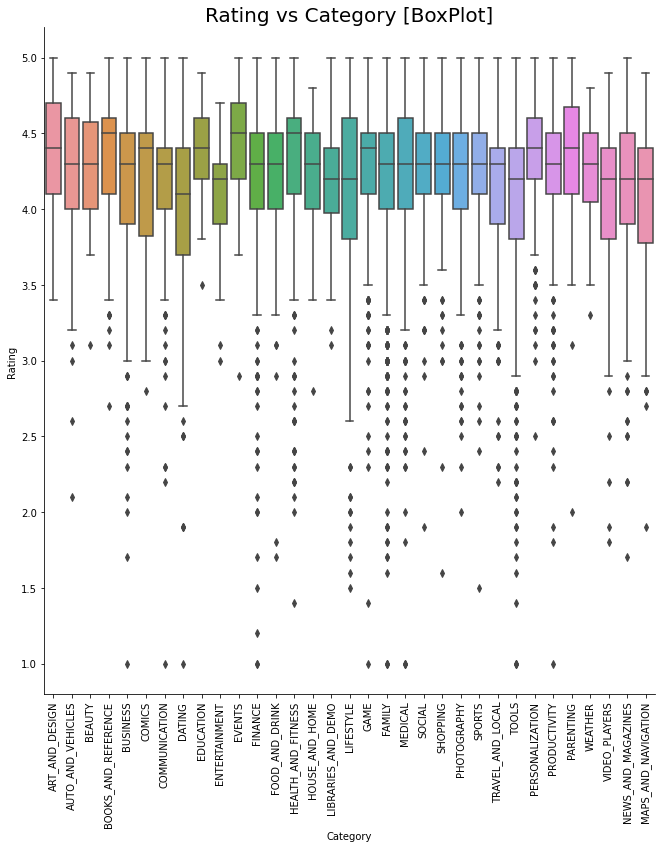

In [9]:
plt.figure(figsize=(10,10))
cat= sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)
cat.set_xticklabels(rotation=90)
plt.title('Rating vs Category [BoxPlot]',size = 20)

In [10]:
#Removing `,` from the column
data['Installs']=data['Installs'].str.replace(',','')

In [11]:
#Removing `+` from the column
data['Installs']=data['Installs'].str.replace('+','')

In [12]:
#Converting the column to `int` datatype
data['Installs'] = data['Installs'].astype(int)

In [13]:
#Creating a label encoder object
le=LabelEncoder()

In [14]:
#Label encoding the column to reduce the effect of a large range of values
data['Installs']=le.fit_transform(data['Installs'])

Text(0.5, 1.0, 'Rating vs Installs[RegPlot]')

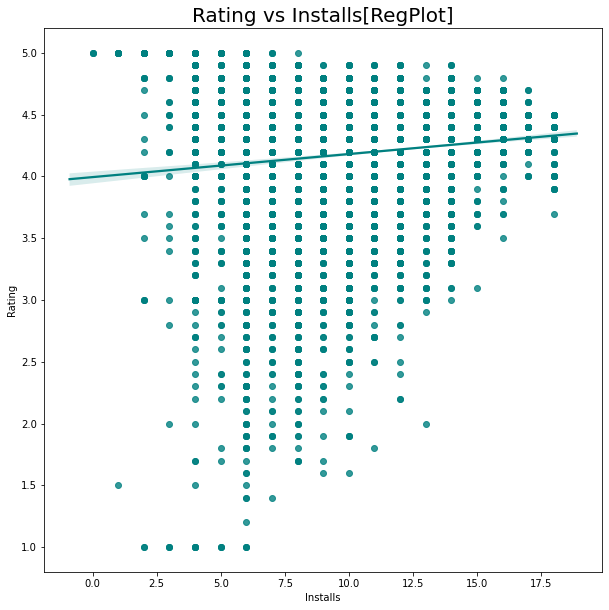

In [15]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data)
plt.title('Rating vs Installs[RegPlot]',size = 20)

In [16]:
data['Price']=data['Price'].str.replace('$','')

In [17]:
data['Price'] = data['Price'].astype(float)

Text(0.5, 1.0, 'Rating vs Price [RegPlot]')

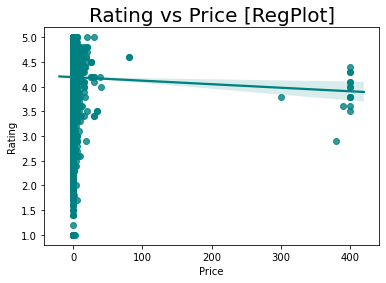

In [18]:
sns.regplot(x="Price", y="Rating", color = 'teal',data=data)

plt.title('Rating vs Price [RegPlot]',size = 20)

In [19]:
#Finding the length of unique genres
print( len(data['Genres'].unique()) , "genres")

115 genres


In [20]:
#Splitting the column to include only the first genre of each app
data['Genres'] = data['Genres'].str.split(';').str[0]

In [21]:
#Grouping Genres and Rating
gr_mean=data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()
gr_mean.describe()

,Rating
count,48.000000
mean,4.212486
std,0.104071
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


In [22]:
#Sorting the grouped dataframe by Rating
gr_mean=gr_mean.sort_values('Rating')
gr_mean.head()

,Genres,Rating
14,Dating,3.970769
44,Trivia,4.039286
42,Tools,4.047203
25,Maps & Navigation,4.051613
45,Video Players & Editors,4.063190


In [23]:
#Converting the column into datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [24]:
#Creating new column having `Last Updated` in days
data['Last Updated Days'] = (data['Last Updated'].max()-data['Last Updated'] ).dt.days 

Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')

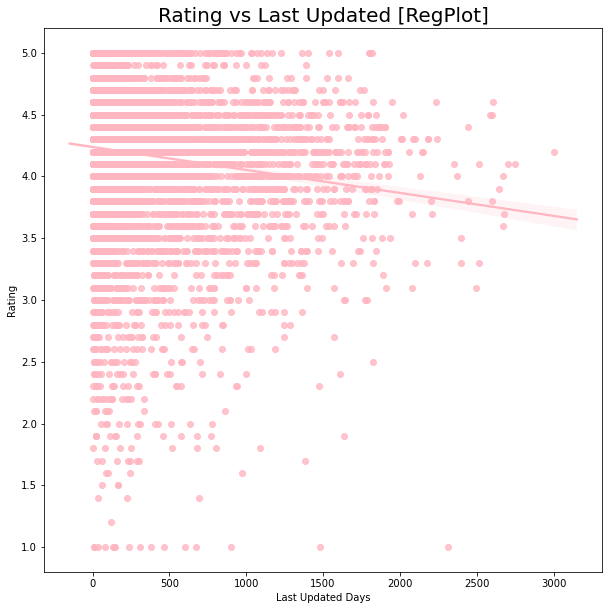

In [25]:
plt.figure(figsize = (10,10))
sns.regplot(x="Last Updated Days", y="Rating", color = 'lightpink',data=data )
plt.title('Rating vs Last Updated [RegPlot]',size = 20)